# SVM tutorial

## Libraries : Populating the iterative namespace

In [54]:
# Check required packages - Use pip install to install a new package 
#!pip install numpy

'0.20.3'

In [14]:
from sklearn import svm, datasets
import numpy as np
import pylab as plt
%matplotlib inline

### Utils

In [15]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    Display classifier and data with labels
    '''
    estimator.fit(X, y)
    #Echelle et grille
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #Separateur
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    #Diplay label color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Sample color 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

## 1. Binary classification

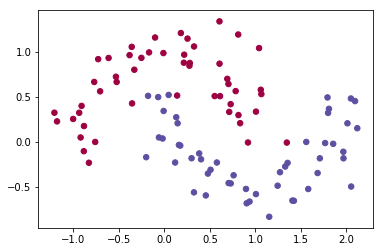

In [16]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral)

Not linearly separable

### Classifier instance 
Display default parameters

In [18]:
svc = svm.SVC(kernel='linear')  # svc = svm.LinearSVC()
print("Default parameters:")
svc

Default parameters:


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Paramaters tuning
* Kernel variation

Text(0.5, 1.0, 'Linear kernel')

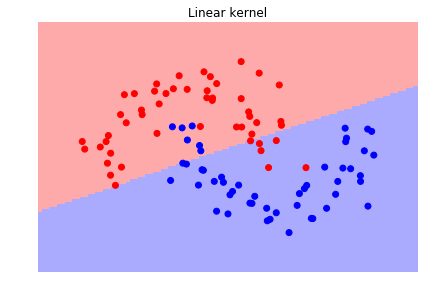

In [19]:
svc.kernel='linear'
svc.fit(X, y)
plot_estimator(svc, X, y)
plt.title('Linear kernel')

Text(0.5, 1.0, 'Polynomial kernel')

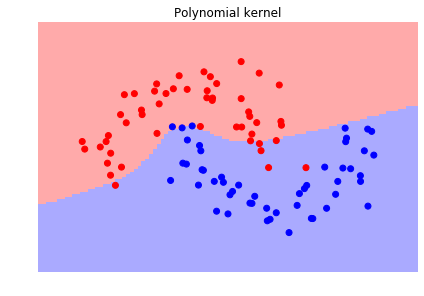

In [22]:
svc = svm.SVC(kernel='poly', gamma='scale', degree=3)
svc.fit(X, y)
plot_estimator(svc, X, y)
plt.title('Polynomial kernel')

Text(0.5, 1.0, 'RBF kernel')

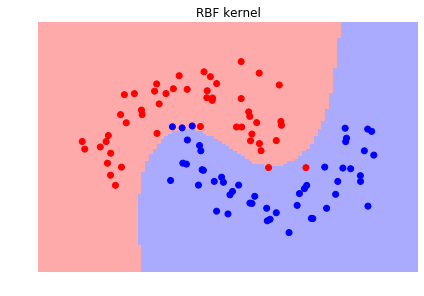

In [27]:
svc = svm.SVC(kernel='rbf', gamma='scale') #, gamma=1)
svc.fit(X, y)
plot_estimator(svc, X, y)
plt.title('RBF kernel')

Text(0.5, 1.0, 'RBF kernel - Display support vector')

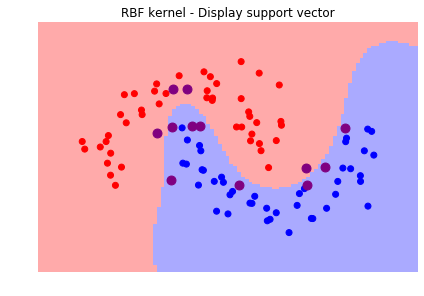

In [35]:
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='purple', zorder=10)
plt.title('RBF kernel - Display support vector')

Conclusion ?

* Penalty parameter C of the error term

Text(0.5, 1.0, 'Low penalty C')

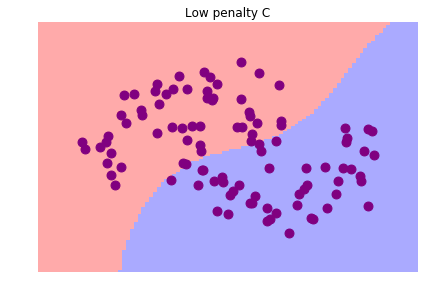

In [36]:
svc = svm.SVC(kernel='rbf', C=.01, gamma='scale')
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='purple', zorder=10)
plt.title('Low penalty C')

Text(0.5, 1.0, 'High penalty C')

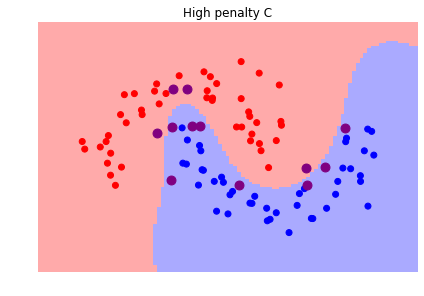

In [37]:
svc = svm.SVC(kernel='rbf', C=100, gamma='scale')
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='purple', zorder=10)
plt.title('High penalty C')

Conclusion?

## 2. Multiclass classification

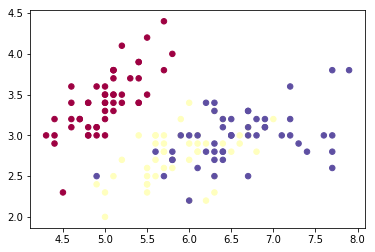

In [38]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral)

SVC multi-class works with "one versus one" strategy, k(k-1)/2 SVMs are build. LinearSVC uses "one versus all" strategy for multi-classification to run faster for such as sparse data sets, text mining is a typical example.

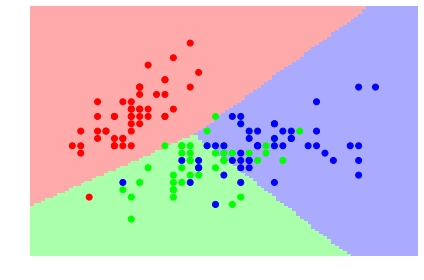

In [41]:
plot_estimator(svm.LinearSVC(max_iter=10000), X, y)

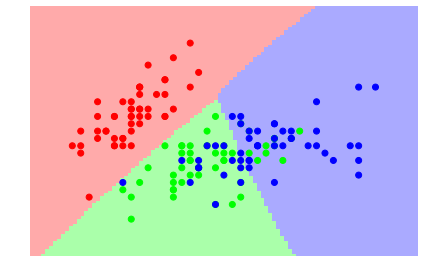

In [43]:
svc = svm.SVC(kernel="rbf", gamma='scale')
plot_estimator(svc, X, y)

Conclusion?

## 3. Novelty/Outlier Detection

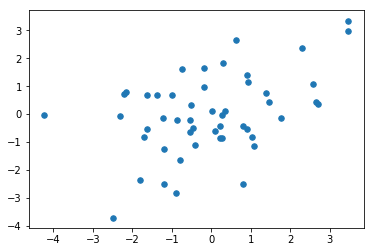

In [44]:
X = np.random.multivariate_normal([0, 0], [[2, 1],[1, 2]], 50)
plt.scatter(X[:,0], X[:,1], s=30, cmap=plt.cm.Spectral)

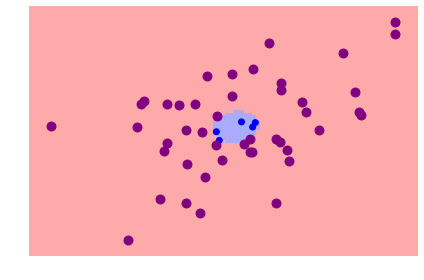

In [51]:
clf = svm.OneClassSVM(nu=0.9, kernel="rbf", gamma=0.1)
clf.fit(X)
y = clf.predict(X)
plot_estimator(clf, X, y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='purple', zorder=10)

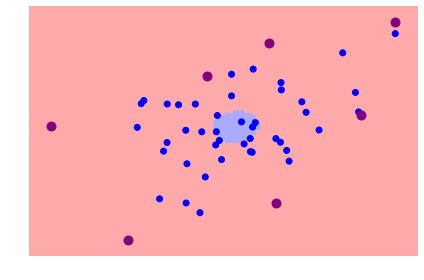

In [52]:
svoc = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
svoc.fit(X)
y = svoc.predict(X)
plot_estimator(clf, X, y)
plt.scatter(svoc.support_vectors_[:, 0], svoc.support_vectors_[:, 1], s=80, facecolors='purple', zorder=10)

Conclusion?